<a href="https://colab.research.google.com/github/a4abhishekkmr/Neural-Networks--ARTH/blob/master/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing pandas

In [2]:
import pandas as pd

In [3]:
#Importing DAtaset

In [4]:
dataset=pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
y = dataset['Exited']

In [8]:

X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'EstimatedSalary']]
X.shape

(10000, 8)

In [9]:
#One Hot Encoding For Geography Feature

In [10]:
Geo = pd.get_dummies(dataset['Geography'], drop_first=True)
Geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
#One Hot Encoding For Gender Feature

In [13]:
Gender = pd.get_dummies(dataset['Gender'], drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
X = pd.concat([X, Geo, Gender], axis=1)
X.shape

(10000, 11)

In [15]:
#importing train_test_split

#Before feeding your data into the neural network you need to split that data into training set and testing set. this can be done using

#train_test_split method from sklearn library and from model_selection module

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)

In [17]:

#importing Sequrntial Model From keras


In [18]:
from keras.models import Sequential
model = Sequential()            # creating Empty model

In [19]:
#Importing Dense Layer

In [21]:
from keras.layers import Dense

In [22]:
#Adding First Layer to model with neurons=8, input_feature=11 and activation fn = relu (rectified linear unit)

In [27]:
#1st layer
model.add(Dense(units=8, activation='relu', input_dim=11))

In [28]:
#Relu is an activation function i.e its will activate the neurons in the hidden layers. The main functions of relu is that all the output from a layers from all the neuron will pass to another layers of the respective neurons.

In [29]:
#Adding Second Layer with neurons=6 and activation fn = relu

In [30]:
model.add(Dense(units=6, activation='relu'))

In [31]:
#Adding third layer with neurons=6 and activation fn = relu

In [32]:
model.add(Dense(units=6, activation='relu'))

In [33]:
#Adding last layer with neurons=1 and activation fn = relu

In [34]:
model.add(Dense(units=1, activation='sigmoid'))

In [36]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 8,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7

In [38]:
#Now

In [39]:
from keras.optimizers import Adam

In [40]:
#As i have only one output that whether the Employee is exited from the company or not. i.e Binary output (Exited/notexited). So the loss will be generating in binary. To handle the binary loss we have binary_crossentropy.

In [41]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001))

In [42]:
model.get_weights()

[array([[-3.24512690e-01,  1.05140805e-01, -3.59451771e-01,
          6.60423040e-02, -2.00278848e-01,  5.07228673e-01,
         -1.10296339e-01,  1.44838214e-01],
        [-4.69111592e-01,  1.56002581e-01,  4.59399521e-01,
          3.97834003e-01,  5.53360522e-01,  2.58718491e-01,
          6.69040680e-02, -6.36033714e-02],
        [-1.50493860e-01, -2.19330609e-01,  4.56126630e-01,
         -1.24300987e-01, -2.95193255e-01, -4.55986947e-01,
         -3.01126659e-01,  4.65699494e-01],
        [-3.98196697e-01,  4.61718738e-01, -3.37582827e-01,
          1.00843430e-01, -3.63381267e-01,  1.04229867e-01,
          1.36534810e-01,  1.05256557e-01],
        [-4.16227132e-01, -2.37134218e-01, -5.16408980e-01,
          5.09679317e-04,  4.74111497e-01,  1.08111918e-01,
          2.13406682e-02,  1.64789379e-01],
        [-1.07352406e-01,  1.90047622e-01, -2.54309088e-01,
         -1.38040602e-01, -2.80782253e-01,  1.99857056e-01,
         -9.59072113e-02,  1.20634913e-01],
        [-1.1608

In [43]:
#For training the model we need to fit the model and it require training data i.e X_train, y_train. And the epochs is 100. That means your training data will goes 100 times through the neural network which you have build above with the respective layers.

In [44]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.7464
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 1.7440
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5992
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5494
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5707
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 1.6293
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 1.3913
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5151
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5024
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 1.4145
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 1.4848
Epoch 12/100
250/250 [==============================] - 0s 1ms/step - loss: 1.3946
Epoch 13/100


In [45]:
loss = pd.DataFrame(model.history.history)
loss

,loss
0,1.703909
1,1.674950
2,1.645943
3,1.617571
4,1.590355
...,...
95,0.634370
96,0.633747
97,0.633097
98,0.632466


In [46]:
#Plotting Loss Graph

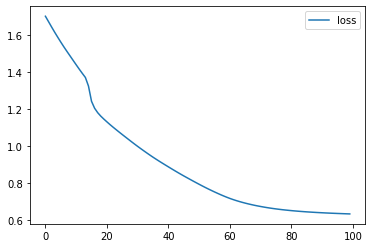

In [47]:
loss.plot()

In [48]:
#As you can see the graph of the loss is slowly decreasing. So this can be possible because of Adam Optimizers

In [49]:
#Prediction
# To predict i am just giving random iputs but you can use the right values and it will predict on that case.

In [50]:
print("The employee will  :", model.predict([[1,2,3,4,5,6,7,8,9,10,11]])[0][0])

The employee will  : 0.4920172
